In [0]:
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


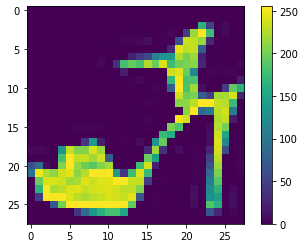

In [0]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

The pixel value fall in the range of 0 to 255. So scaling these values to a range between 0 to 1.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

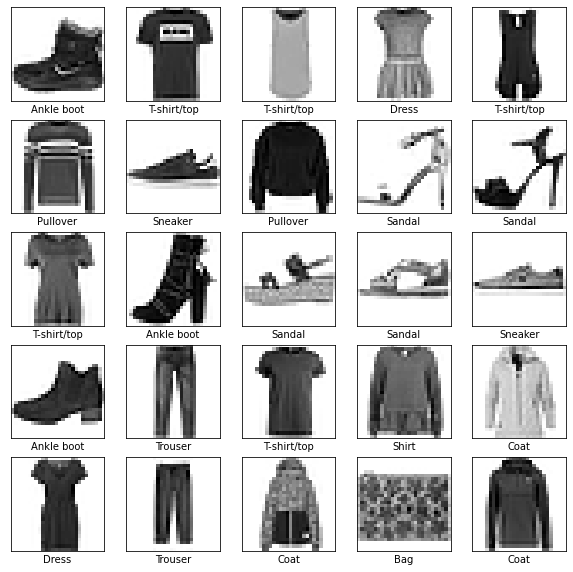

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Baseline model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.4990 - accuracy: 0.8236
Epoch 2/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.3756 - accuracy: 0.8634
Epoch 3/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.3363 - accuracy: 0.8758
Epoch 4/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.3117 - accuracy: 0.8854
Epoch 5/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.2950 - accuracy: 0.8920
Epoch 6/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.2804 - accuracy: 0.8973
Epoch 7/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2679 - accuracy: 0.9011
Epoch 8/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2576 - accuracy: 0.9041
Epoch 9/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2474 - accuracy: 0.9086
Epoch 10/30
60000/60000 [==============================

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 0.3902308100923896

Test accuracy: 0.890999972820282


# Deeper neural network

In [0]:
deeper_model = keras.Sequential([
                                  keras.layers.Flatten(input_shape=(28, 28)),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(10)
                                  ])

In [0]:
deeper_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
deeper_model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.4976 - accuracy: 0.8196
Epoch 2/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.3729 - accuracy: 0.8632
Epoch 3/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.3359 - accuracy: 0.8770
Epoch 4/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.3133 - accuracy: 0.8854
Epoch 5/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.2986 - accuracy: 0.8881
Epoch 6/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.2830 - accuracy: 0.8937
Epoch 7/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.2716 - accuracy: 0.8985
Epoch 8/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.2606 - accuracy: 0.9021
Epoch 9/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.2499 - accuracy: 0.9047
Epoch 10/30
60000/60000 [==============================

In [0]:
test_loss, test_acc = deeper_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 0.41746137037873265

Test accuracy: 0.8937000036239624


With a deeper neural network the Test loss has increased and the accuracy is pretty much the same. We need the loss to be small and the accuracy to be high, so the deeper network performed a little worse than the baseline model.

# Dropout model

In [0]:
dropout_model = keras.Sequential([
                                  keras.layers.Flatten(input_shape=(28, 28)),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dropout(0.25),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dropout(0.25),
                                  keras.layers.Dense(10)
                                  ])

In [0]:
dropout_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
dropout_model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 6s 105us/step - loss: 0.5641 - accuracy: 0.7944
Epoch 2/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.4052 - accuracy: 0.8538
Epoch 3/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.3683 - accuracy: 0.8681
Epoch 4/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.3427 - accuracy: 0.8757
Epoch 5/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.3272 - accuracy: 0.8809
Epoch 6/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.3117 - accuracy: 0.8871
Epoch 7/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.3055 - accuracy: 0.8887
Epoch 8/30
60000/60000 [==============================] - 6s 105us/step - loss: 0.2955 - accuracy: 0.8916
Epoch 9/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.2847 - accuracy: 0.8960
Epoch 10/30
60000/60000 [=====================

In [0]:
test_loss, test_acc = dropout_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 0.3689968435049057

Test accuracy: 0.8888999819755554


The Test loss has reduced a lot which is a good thing. The accuracy remains somewhat closer to the previous models. So dropout does help to avoid overfitting.

# Batch normalization

In [0]:
batch_norm_model = keras.Sequential([
                                  keras.layers.Flatten(input_shape=(28, 28)),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.Dense(128, activation='relu'),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(10)
                                  ])

In [0]:
batch_norm_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
batch_norm_model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.4931 - accuracy: 0.8260
Epoch 2/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.3879 - accuracy: 0.8577
Epoch 3/30
60000/60000 [==============================] - 8s 128us/step - loss: 0.3538 - accuracy: 0.8716
Epoch 4/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.3310 - accuracy: 0.8787
Epoch 5/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.3101 - accuracy: 0.8855
Epoch 6/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.2946 - accuracy: 0.8903
Epoch 7/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.2841 - accuracy: 0.8943
Epoch 8/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.2726 - accuracy: 0.8995
Epoch 9/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.2634 - accuracy: 0.9029
Epoch 10/30
60000/60000 [=====================

In [0]:
test_loss, test_acc = batch_norm_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 0.35735199528336525

Test accuracy: 0.8931999802589417


Batch normalization has further reduced the Test loss and has given a good accuracy as well.

# Learning curves for all three

In [0]:
history_base = model.fit(train_images, train_labels, epochs=30, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.4959 - accuracy: 0.8278 - val_loss: 0.4426 - val_accuracy: 0.8362
Epoch 2/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.3759 - accuracy: 0.8646 - val_loss: 0.3951 - val_accuracy: 0.8563
Epoch 3/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.3365 - accuracy: 0.8783 - val_loss: 0.3624 - val_accuracy: 0.8679
Epoch 4/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.3116 - accuracy: 0.8866 - val_loss: 0.3635 - val_accuracy: 0.8655
Epoch 5/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.2961 - accuracy: 0.8906 - val_loss: 0.3445 - val_accuracy: 0.8747
Epoch 6/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.2784 - accuracy: 0.8972 - val_loss: 0.3588 - val_accuracy: 0.8725
Epoch 7/30
60000/60000 [==============================] - 5s 78us/st

In [0]:
history_dropout = dropout_model.fit(train_images, train_labels, epochs=30, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.5624 - accuracy: 0.7970 - val_loss: 0.4351 - val_accuracy: 0.8363
Epoch 2/30
60000/60000 [==============================] - 7s 110us/step - loss: 0.4055 - accuracy: 0.8530 - val_loss: 0.3869 - val_accuracy: 0.8620
Epoch 3/30
60000/60000 [==============================] - 7s 108us/step - loss: 0.3688 - accuracy: 0.8662 - val_loss: 0.3735 - val_accuracy: 0.8640
Epoch 4/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.3424 - accuracy: 0.8756 - val_loss: 0.3809 - val_accuracy: 0.8675
Epoch 5/30
60000/60000 [==============================] - 7s 108us/step - loss: 0.3281 - accuracy: 0.8814 - val_loss: 0.3746 - val_accuracy: 0.8675
Epoch 6/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.3136 - accuracy: 0.8860 - val_loss: 0.4052 - val_accuracy: 0.8634
Epoch 7/30
60000/60000 [==============================] - 7s 1

In [0]:
history_batch_norm = batch_norm_model.fit(train_images, train_labels, epochs=30, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.4990 - accuracy: 0.8222 - val_loss: 0.4786 - val_accuracy: 0.8326
Epoch 2/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.3860 - accuracy: 0.8582 - val_loss: 0.4285 - val_accuracy: 0.8390
Epoch 3/30
60000/60000 [==============================] - 8s 130us/step - loss: 0.3508 - accuracy: 0.8705 - val_loss: 0.4889 - val_accuracy: 0.8317
Epoch 4/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.3310 - accuracy: 0.8773 - val_loss: 0.3486 - val_accuracy: 0.8726
Epoch 5/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.3104 - accuracy: 0.8864 - val_loss: 0.3725 - val_accuracy: 0.8636
Epoch 6/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.2968 - accuracy: 0.8892 - val_loss: 0.3331 - val_accuracy: 0.8813
Epoch 7/30
60000/60000 [==============================] - 8s 1

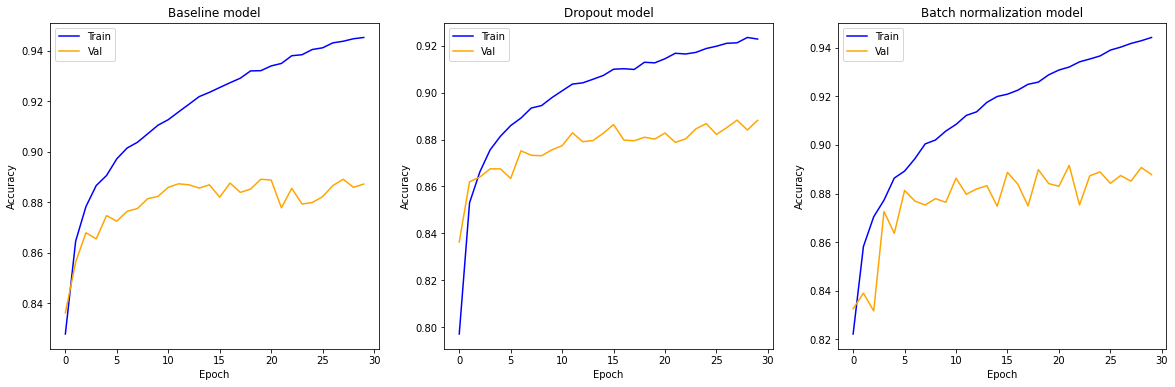

In [0]:
def plot(history_base,history_dropout,history_batch_norm):
  
  # The history object contains results on the training and test
  # sets for each epoch

  acc_base = history_base.history['accuracy']
  val_acc_base = history_base.history['val_accuracy']

  acc_dropout = history_dropout.history['accuracy']
  val_acc_dropout = history_dropout.history['val_accuracy']

  acc_batch_norm = history_batch_norm.history['accuracy']
  val_acc_batch_norm = history_batch_norm.history['val_accuracy']

  # Get the number of epochs
  epochs = range(len(acc_base))

  fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 6))

  ax[0].set_title('Baseline model')
  ax[0].plot(epochs, acc_base, color='blue', label='Train')
  ax[0].plot(epochs, val_acc_base, color='orange', label='Val')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()

  ax[1].set_title('Dropout model')
  ax[1].plot(epochs, acc_dropout, color='blue', label='Train')
  ax[1].plot(epochs, val_acc_dropout, color='orange', label='Val')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()


  ax[2].set_title('Batch normalization model')
  ax[2].plot(epochs, acc_batch_norm, color='blue', label='Train')
  ax[2].plot(epochs, val_acc_batch_norm, color='orange', label='Val')
  ax[2].set_xlabel('Epoch')
  ax[2].set_ylabel('Accuracy')
  ax[2].legend()
  
  
plot(history_base,history_dropout,history_batch_norm)

As stated above, BatchNormalization helps improve the accuracy a bit. Here we can see that, addition of Dropout and BatchNormalization layers, helps to prevent overfitting in a deeper network. Our baseline model has just one hidden layer, and so there is no overfitting issue, but the other deeper models we able to perform better than the baseline model in terms of accuracy and loss values, because of using Dropout and BatchNormalization techniques.